In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

data_new = pd.read_csv('/content/gdrive/My Drive/pd_diagnosis/normalized_df.csv')
data_new.head()

,Unnamed: 0,healthCode,recordId_x,recordId_y,Diagnosis,Age,Gender,accel_walking_outbound.json.items,deviceMotion_walking_outbound.json.items,pedometer_walking_outbound.json.items,...,Jitter,Shimmer,HNR_D,CPP,PSD,H1_H2,GNE_max_4500Hz,Hfno_6000Hz,Shim_dB,ABI
0,0,af11ff58-dffe-4930-bf52-584e0f1cbc5d,569e970c-66ae-4c12-b606-0eb8ef5a5add,26251036-11d5-41a9-8b5a-941a21c90e9d,1,1.463998,0,0.593584,0.593668,0.593719,...,-0.469737,-0.418874,-7.401433,0.120140,-0.208316,0.008227,-0.154157,-0.010777,-0.288481,-0.427349
1,1,32e23bb4-c2ca-489e-a580-d432d05e015e,265dc682-1f12-4b25-9765-3a03cd641b33,263b7474-d753-42e7-98a4-168869eb94cb,0,1.002380,0,0.438058,0.438041,0.438088,...,-0.244610,-0.283953,0.595483,0.593640,-0.189880,-0.036643,-0.318942,0.688017,-0.121095,0.273296
2,2,67440fc1-d449-4f9a-8f0d-8d8a77a492dc,2340a276-7933-4de5-a563-c92fca73b7da,6c9f0267-5362-4c88-bbe7-f250d0e4a462,0,-1.594218,0,1.202960,1.202877,1.202778,...,0.417778,-0.431532,0.280681,0.592604,-0.187832,0.031011,0.244707,-0.147795,-0.304764,-0.284094
3,3,e8b3b9a4-a48e-4212-aad8-0ee8d9a4f911,f1cf8e58-8b49-42c4-8620-c625b2689194,71ffce5b-73f3-4f71-8aee-215a8fbd3353,1,0.656167,0,-1.202174,-1.202365,-1.202559,...,-0.639159,-0.340148,-0.661027,0.398740,-0.200122,0.128533,1.014009,-0.235911,-0.189482,-0.973663
4,4,98753b69-11dd-43f4-8eff-a54e052da982,5f64edbd-b58b-44f8-9d78-2876be5ab591,7cf01cee-7160-475c-8fe6-c809e6c34c7d,1,0.252252,0,-0.369844,-0.369682,-0.369523,...,-0.621270,0.796280,-0.145085,-0.351019,-0.333954,0.014231,-0.473523,-0.543959,0.927524,0.666605


In [ ]:
data_new.columns

Index(['Unnamed: 0', 'healthCode', 'recordId_x', 'recordId_y', 'Diagnosis',
       'Age', 'Gender', 'accel_walking_outbound.json.items',
       'deviceMotion_walking_outbound.json.items',
       'pedometer_walking_outbound.json.items',
       'accel_walking_return.json.items',
       'deviceMotion_walking_return.json.items',
       'pedometer_walking_return.json.items', 'accel_walking_rest.json.items',
       'deviceMotion_walking_rest.json.items', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'Volume_mean', 'Volume_std',
       'Pitch_mean', 'Pitch_std', 'ZCR_mean', 'ZCR_std', 'RMS_mean', 'RMS_std',
       'Spectral_Centroid_mean', 'Spectral_Centroid_std',
       'Spectral_Bandwidth_mean', 'Spectral_Bandwidth_std',
       'Spectral_Rolloff_mean', 'Spectral_Rolloff_std', 'Jitter', 'Shimmer',
       'HNR_D', 'CPP', 'PSD', 'H1_H2', 'GNE_max_4500Hz', 'Hfno_6000Hz',
       'Shim_dB', 'ABI'],
      dtype='object')

In [ ]:
# gait only random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'accel_walking_outbound.json.items':'deviceMotion_walking_rest.json.items']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.4590804597701149

In [ ]:
accuracy_scores_rf

[0.5333333333333333,
 0.4666666666666667,
 0.43333333333333335,
 0.3793103448275862,
 0.4827586206896552]

In [ ]:
precision_scores_rf

[0.5882352941176471, 0.5, 0.5625, 0.3888888888888889, 0.6153846153846154]

In [ ]:
recall_scores_rf

[0.5882352941176471, 0.5, 0.47368421052631576, 0.5, 0.4444444444444444]

In [ ]:
# voice only random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'PC2':'ABI']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.526896551724138

In [ ]:
accuracy_scores_rf

[0.5,
 0.4666666666666667,
 0.6333333333333333,
 0.5862068965517241,
 0.4482758620689655]

In [ ]:
precision_scores_rf

[0.55, 0.5, 0.7222222222222222, 0.55, 0.5625]

In [ ]:
recall_scores_rf

[0.6470588235294118, 0.5625, 0.6842105263157895, 0.7857142857142857, 0.5]

In [ ]:
# demographics only

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'Age':'Gender']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.7560919540229885

In [ ]:
accuracy_scores_rf

[0.8333333333333334,
 0.8,
 0.7333333333333333,
 0.7241379310344828,
 0.6896551724137931]

In [ ]:
precision_scores_rf

[0.8333333333333334, 0.75, 0.8666666666666667, 0.6875, 0.6956521739130435]

In [ ]:
recall_scores_rf

[0.8823529411764706,
 0.9375,
 0.6842105263157895,
 0.7857142857142857,
 0.8888888888888888]

In [ ]:
# gait and demographics random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'Age':'deviceMotion_walking_rest.json.items']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.7222988505747125

In [ ]:
accuracy_scores_rf

[0.8333333333333334,
 0.7,
 0.7333333333333333,
 0.6551724137931034,
 0.6896551724137931]

In [ ]:
precision_scores_rf

[0.8333333333333334,
 0.7692307692307693,
 0.7894736842105263,
 0.6,
 0.7142857142857143]

In [ ]:
recall_scores_rf

[0.8823529411764706,
 0.625,
 0.7894736842105263,
 0.8571428571428571,
 0.8333333333333334]

In [ ]:
# voice and demographics random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'Age':'ABI']
features_final.drop(['accel_walking_outbound.json.items',
       'deviceMotion_walking_outbound.json.items',
       'pedometer_walking_outbound.json.items',
       'accel_walking_return.json.items',
       'deviceMotion_walking_return.json.items',
       'pedometer_walking_return.json.items', 'accel_walking_rest.json.items',
       'deviceMotion_walking_rest.json.items'], axis=1, inplace=True)
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.7425287356321839

In [ ]:
accuracy_scores_rf

[0.7666666666666667,
 0.8333333333333334,
 0.7333333333333333,
 0.7241379310344828,
 0.6551724137931034]

In [ ]:
precision_scores_rf

[0.8125, 0.7894736842105263, 0.7619047619047619, 0.6363636363636364, 0.7]

In [ ]:
recall_scores_rf

[0.7647058823529411, 0.9375, 0.8421052631578947, 1.0, 0.7777777777777778]

In [ ]:
# gait and voice random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'accel_walking_outbound.json.items':'ABI']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.4995402298850575

In [ ]:
accuracy_scores_rf

[0.5,
 0.5333333333333333,
 0.5333333333333333,
 0.4827586206896552,
 0.4482758620689655]

In [ ]:
precision_scores_rf

[0.5555555555555556,
 0.5555555555555556,
 0.6190476190476191,
 0.4782608695652174,
 0.5625]

In [ ]:
recall_scores_rf

[0.5882352941176471, 0.625, 0.6842105263157895, 0.7857142857142857, 0.5]

In [ ]:
# gait and voice and demographics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'Age':'ABI']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []
feature_importances_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)
    feature_importance = model_rf.feature_importances_
    feature_importances_rf.append(feature_importance)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.7420689655172413

In [ ]:
accuracy_scores_rf

[0.8666666666666667,
 0.8666666666666667,
 0.6666666666666666,
 0.7241379310344828,
 0.5862068965517241]

In [ ]:
precision_scores_rf

[0.8421052631578947,
 0.8333333333333334,
 0.7142857142857143,
 0.6363636363636364,
 0.65]

In [ ]:
recall_scores_rf

[0.9411764705882353, 0.9375, 0.7894736842105263, 1.0, 0.7222222222222222]

In [ ]:
feature_importances_rf

[array([0.1496275 , 0.00492005, 0.01411715, 0.0076588 , 0.01041115,
        0.0164581 , 0.01196542, 0.01035981, 0.01304457, 0.01279945,
        0.02389099, 0.02716417, 0.01881391, 0.01969405, 0.0538383 ,
        0.02734651, 0.0280986 , 0.02034171, 0.02480824, 0.0252259 ,
        0.01323979, 0.01684081, 0.01758192, 0.01471595, 0.01687585,
        0.02287506, 0.01872652, 0.01905649, 0.02182335, 0.01587068,
        0.01888928, 0.0243142 , 0.01251301, 0.01712868, 0.02934212,
        0.01590741, 0.02131897, 0.02591613, 0.01619204, 0.02380547,
        0.03458947, 0.02612186, 0.0171591 , 0.01861144]),
 array([0.15317142, 0.00688322, 0.01227912, 0.0133576 , 0.01582933,
        0.01729499, 0.01273833, 0.01337952, 0.01483042, 0.00855901,
        0.02778369, 0.01989107, 0.02880267, 0.02679374, 0.06235122,
        0.02971452, 0.02128405, 0.01082625, 0.02154507, 0.02060836,
        0.01878997, 0.0143153 , 0.01668065, 0.03196576, 0.01501445,
        0.01864189, 0.0180049 , 0.01481764, 0.01944765, 0.

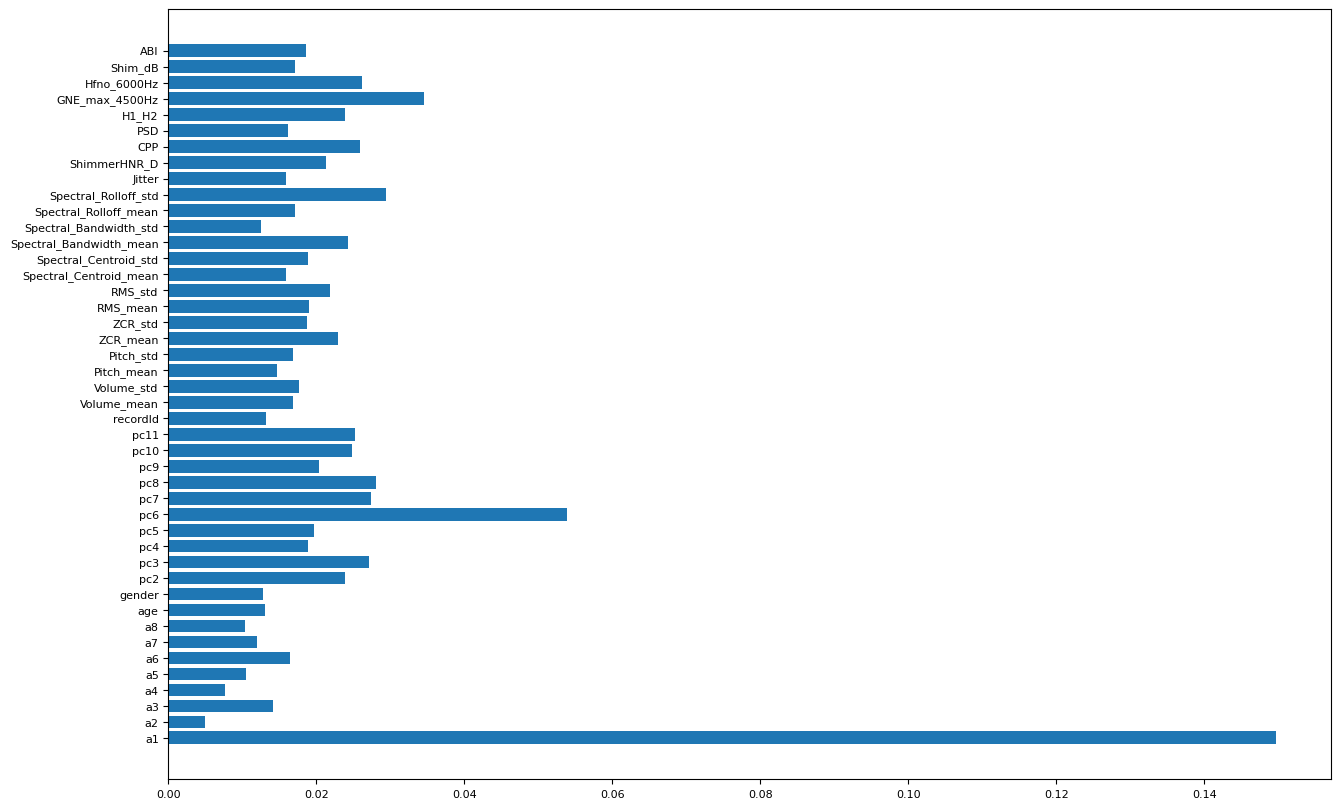

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))  # Set the figure size to 15 inches wide and 10 inches tall

for i in range(5):
    ax.barh(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'age', 'gender', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'recordId', 'Volume_mean', 'Volume_std', 'Pitch_mean', 'Pitch_std', 'ZCR_mean', 'ZCR_std', 'RMS_mean', 'RMS_std', 'Spectral_Centroid_mean',
                    'Spectral_Centroid_std', 'Spectral_Bandwidth_mean', 'Spectral_Bandwidth_std', 'Spectral_Rolloff_mean', 'Spectral_Rolloff_std', 'Jitter', 'Shimmer'
                    'HNR_D', 'CPP', 'PSD', 'H1_H2', 'GNE_max_4500Hz', 'Hfno_6000Hz', 'Shim_dB', 'ABI'], feature_importances_rf[0])

    ax.tick_params(axis='both', labelsize=8)  # Set the tick label size to 8 points

    plt.show()


In [ ]:
# gait and voice and demographics naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = data_new.loc[:, 'Age':'ABI']
labels_final = data_new['Diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_nb = []
recall_scores_nb = []
precision_scores_nb = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_nb = GaussianNB()
    model_nb.fit(X_train_final, y_train_final)

    predictions_nb = model_nb.predict(X_test_final)
    accuracy_nb = accuracy_score(y_test_final, predictions_nb)
    recall_nb = recall_score(y_test_final, predictions_nb)
    precision_nb = precision_score(y_test_final, predictions_nb)
    accuracy_scores_nb.append(accuracy_nb)
    recall_scores_nb.append(recall_nb)
    precision_scores_nb.append(precision_nb)

average_accuracy_nb = np.mean(accuracy_scores_nb)
average_accuracy_nb

0.546896551724138

In [ ]:
accuracy_scores_nb

[0.6,
 0.6333333333333333,
 0.4666666666666667,
 0.5517241379310345,
 0.4827586206896552]

In [ ]:
precision_scores_nb

[0.6470588235294118,
 0.6666666666666666,
 0.6666666666666666,
 0.5555555555555556,
 0.5789473684210527]

In [ ]:
recall_scores_nb

[0.6470588235294118,
 0.625,
 0.3157894736842105,
 0.35714285714285715,
 0.6111111111111112]

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
import shap

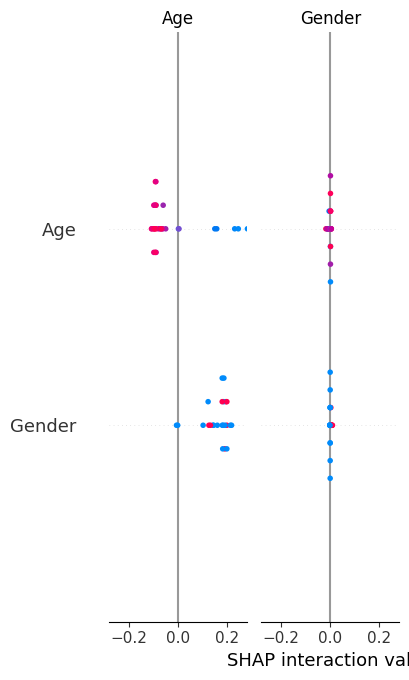

In [ ]:
explainer = shap.TreeExplainer(model_rf)

shap_values = explainer.shap_values(X_test_final)
shap.summary_plot(shap_values, X_test_final)

In [ ]:
import shap

# ... (rest of your code remains the same)

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)

    # Create a SHAP explainer
    explainer = shap.TreeExplainer(model_rf)

    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test_final)

<Figure size 1000x600 with 0 Axes>

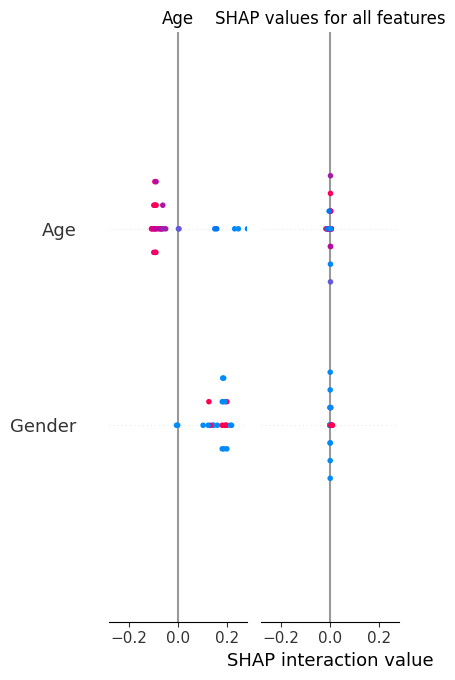

In [ ]:
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_final, plot_type="bar", show=False)
    plt.title("SHAP values for all features")
    plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

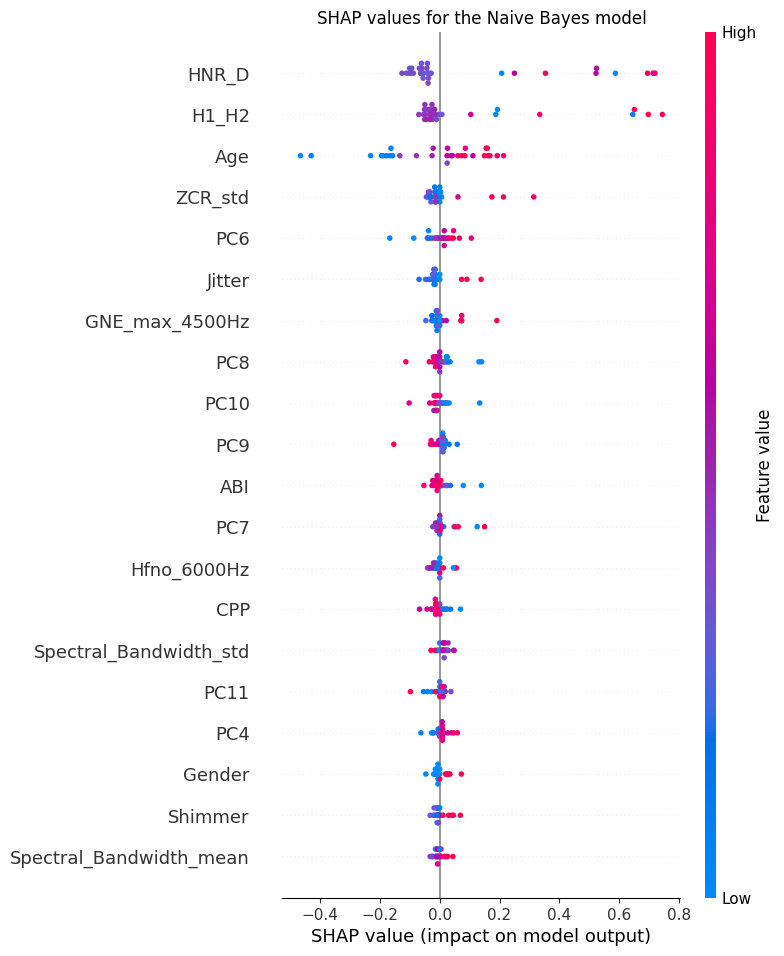

  0%|          | 0/30 [00:00<?, ?it/s]

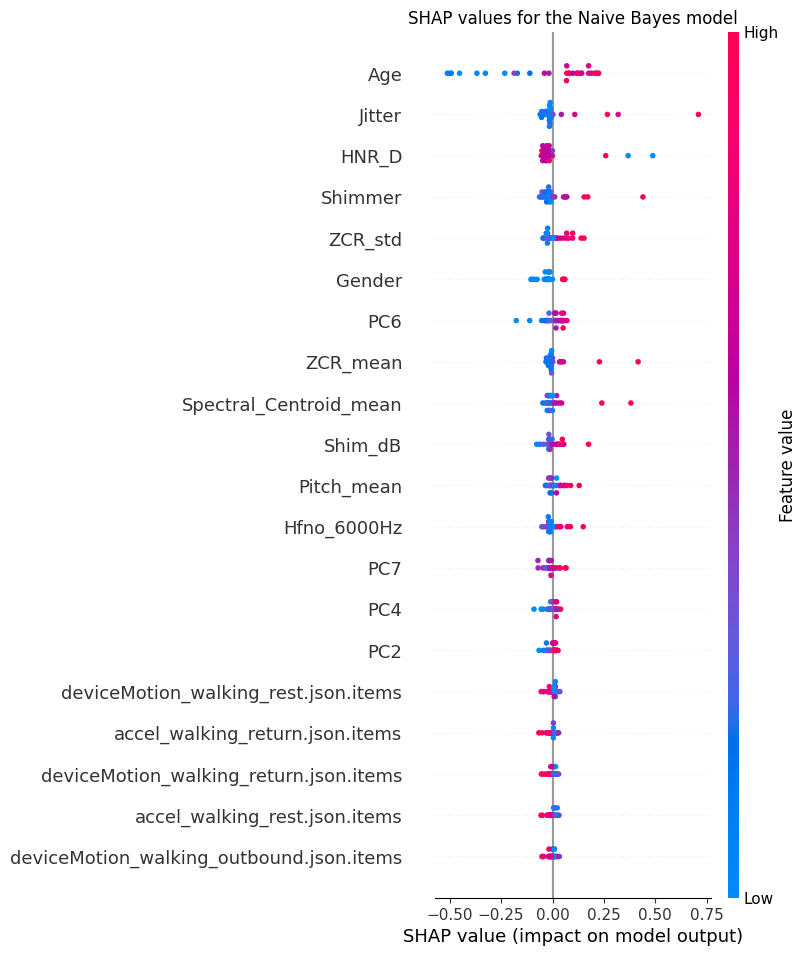

  0%|          | 0/30 [00:00<?, ?it/s]

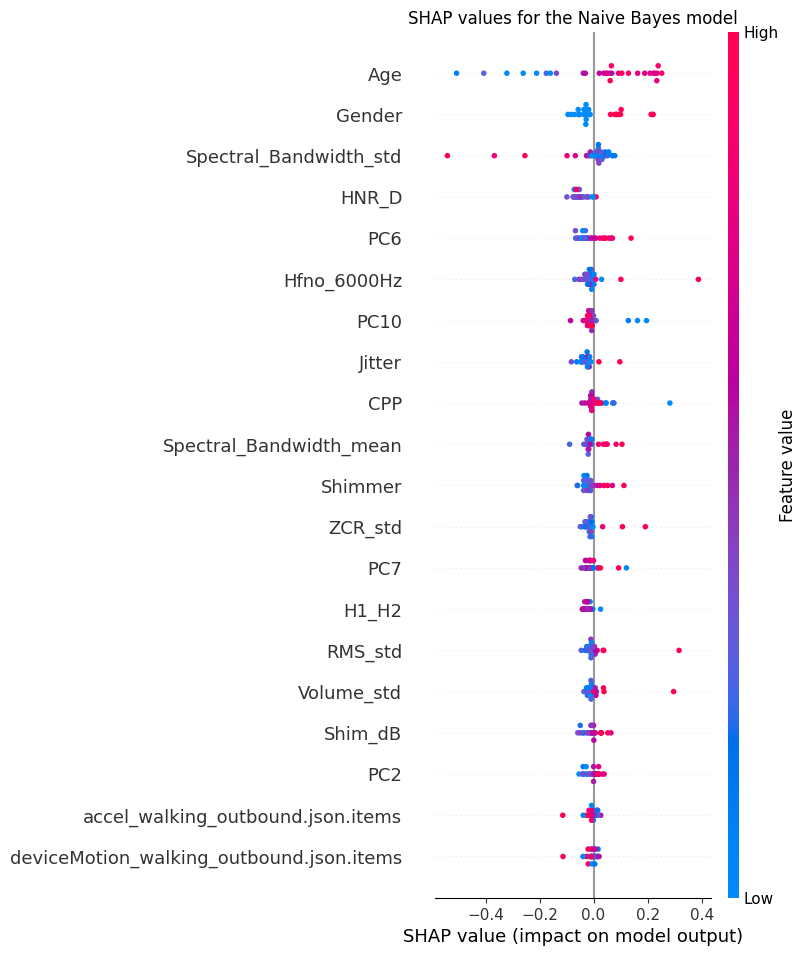

  0%|          | 0/29 [00:00<?, ?it/s]

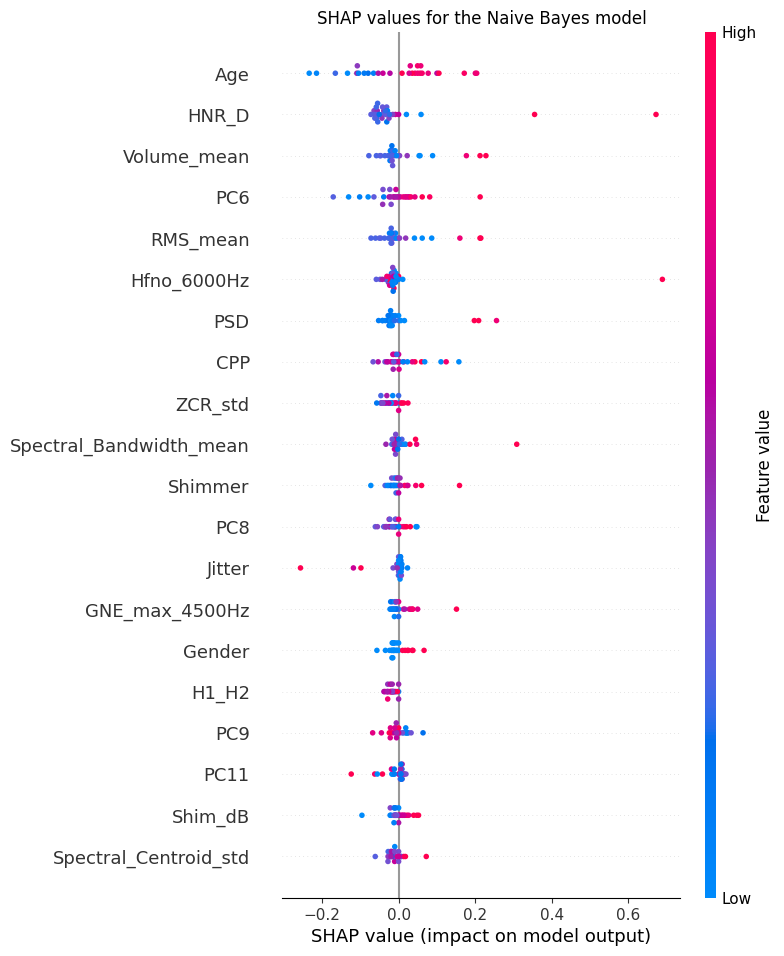

  0%|          | 0/29 [00:00<?, ?it/s]

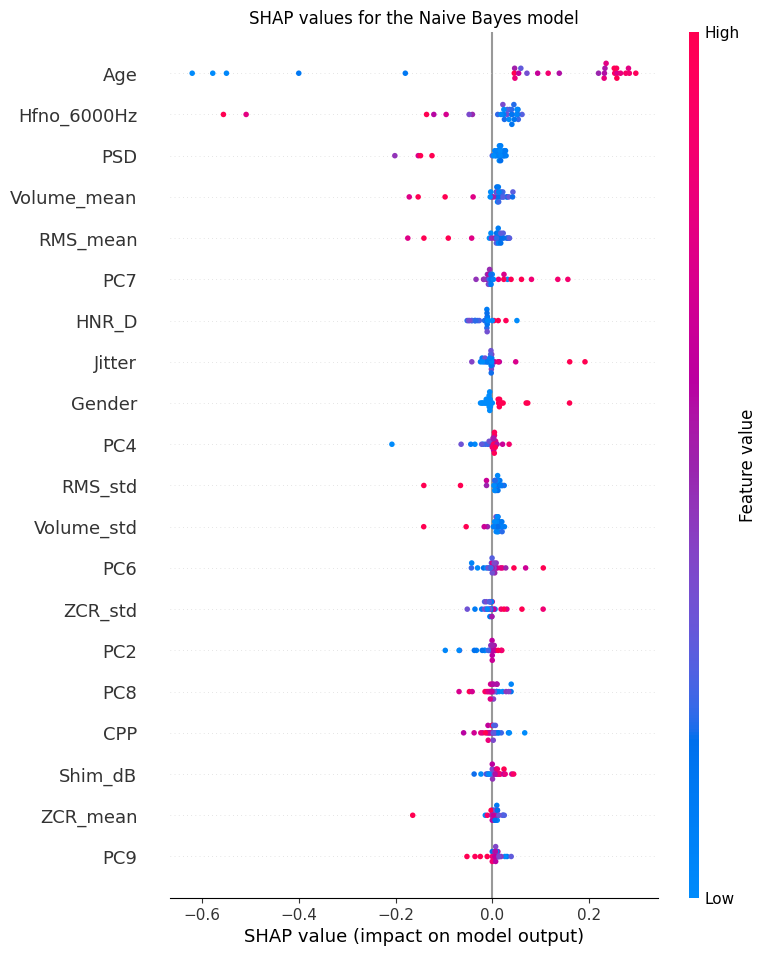

In [ ]:
import shap

# ... (rest of your code remains the same)

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_nb = GaussianNB()
    model_nb.fit(X_train_final, y_train_final)

    predictions_nb = model_nb.predict(X_test_final)
    accuracy_nb = accuracy_score(y_test_final, predictions_nb)
    recall_nb = recall_score(y_test_final, predictions_nb)
    precision_nb = precision_score(y_test_final, predictions_nb)
    accuracy_scores_nb.append(accuracy_nb)
    recall_scores_nb.append(recall_nb)
    precision_scores_nb.append(precision_nb)

    # Create a SHAP explainer
    explainer = shap.KernelExplainer(model_nb.predict, X_train_final)

    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test_final)

    # Plot the SHAP values
    shap.summary_plot(shap_values, X_test_final, show=False)
    plt.title("SHAP values for the Naive Bayes model")
    plt.show()